# CMPT 423/820 
## Assignment 2 Question 1
* Austin Heinrich
* 11177796
* awh055

The IRIS dataset (used in A1 and also in lecture) has 4 continuous features/attributes, and the class label.
We saw in class that we can get pretty good accuracy using one Gaussian Naive Bayes Classier (GNBC)
when all 4 features/attributes are used.
In this question, we will build 4 dierent GNBCs, each classier using only one of the features/attributes
to t the model. In other words, the rst classier will use feature/attribute/column 1, the second classier
will use feature/attribute/column 2, etc.

1. Build the four 1-feature classiers, and calculate the accuracy of each.

2. Build the 4-feature classier (as we saw in class), and calculate the accuracy.

3. Reproduce the density plots from A1Q7 Task 4 that shows the class density for each feature, and compare the density plots to the accuracy scores you obtained. In a few sentences discuss how the density plot relates to the accuracy score.

4. Compare the best 1-feature classifier to the 4-feature classifier, in terms of accuracy. Discuss briefy your results.

In [6]:
# Four 1-feature classifiers and their accuracies

import pandas as pd
from sklearn.naive_bayes import GaussianNB

dataframe = pd.read_csv('iris.csv', 
                        header=None,
                        names=['SL','SW','PL','PW','Class'],
                        index_col=False)

# Create Gaussian Naive Bayes Object
clf = GaussianNB()
clf_sl = GaussianNB()
clf_sw = GaussianNB()
clf_pl = GaussianNB()
clf_pw = GaussianNB()

# Separate the features X from the labels Y
array = dataframe.values
X = array[:,:4]
Y = array[:,4]

# split columns into sepal_length, sepal_width, et al.
SL = X[:,0]
SW = X[:,1]
PL = X[:,2]
PW = X[:,3]

# fitting the model to the data for each column
clf.fit(X, Y)

SL = SL.reshape(-1, 1) # must shape arrays, else we get Value errors
clf_sl.fit(SL, Y)
SW = SW.reshape(-1, 1)
clf_sw.fit(SW, Y)
PL = PL.reshape(-1, 1)
clf_pl.fit(PL, Y)
PW = PW.reshape(-1, 1)
clf_pw.fit(PW, Y)

# Predicting class labels from the features
predictions = clf.predict(X)

predict_sl = clf_sl.predict(SL)
predict_sw = clf_sw.predict(SW)
predict_pl = clf_pl.predict(PL)
predict_pw = clf_pw.predict(PW)

# print the accuracy
print("Accuracy:", sum(predictions == Y)/len(predictions) )

print("Accuracy of sepal length:", sum(predict_sl == Y)/len(predict_sl))
print("Accuracy of sepal width:", sum(predict_sw == Y)/len(predict_sw))
print("Accuracy of pedal length:", sum(predict_pl == Y)/len(predict_pl))
print("Accuracy of pedal width:", sum(predict_pw == Y)/len(predict_pw))

Accuracy: 0.96
Accuracy of sepal length: 0.7266666666666667
Accuracy of sepal width: 0.5466666666666666
Accuracy of pedal length: 0.9533333333333334
Accuracy of pedal width: 0.96


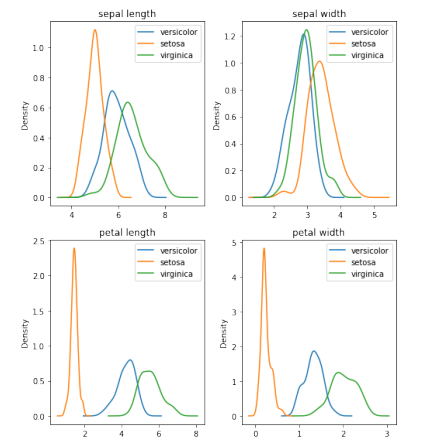
Reproduce the density plots from A1Q7 Task 4 (***honestly just copied an image of them***) that shows the class density for each feature, and compare the density plots to the accuracy scores you obtained. In a few sentences discuss how the density plot relates to the accuracy score.
> Pedal length and pedal width are both more distinguished than either sepal length or sepal width. That is, for pedal length and width -- the more accurate features -- there is much less overlap between lines. The most inaccurate feature, sepal width, shows by far the most overlap between lines.

Compare the best 1-feature classifier to the 4-feature classifier, in terms of accuracy. Discuss briefy your results
> In terms of accuracy, pedal width is equal to the 4-feature classifier. Pedal length, as well, comes very close to the accuracy given by the 4-feature classifer. Sepal width and length are more inaccurate in comparison, *perhaps* indicating pedal length and width are much better at predicting species than sepal width or length.